<a href="https://colab.research.google.com/github/AdamFunk42/AdvLinearAlgebra/blob/master/Project_4_all_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 4 ##



*For this project, we looked at properties of SVD and compared them to how they performed in predicting the form of a function in comparison to those regular best fit models. We looked at a simple case with simple functions raised to a power, a case with trig functions, a case that is unknown, and cases where the data is random and doesn't perfectly fit a line.* 

As we have discovered, SVDs have a great number of useful components. This time, these components are being used to predict a function and is being compared to that of the best fit function. We looked at a variety of cases, the first being a simple function where it had values of coefficients of $x$ up to $x^6$. 

When looking at this case, we started with attempting to look at the properties of this function using only 3 values of the function. We found that this did not do a very good job, for both the best fit model, and for the SVD model. After some consideration, I decided the best number of values to use was 7 for both the number of singular values and points, with  the hypothesis that there were 7 different coefficeints possible. This produced very good for both the best fit model and SVD model with an error close to 0. Interestingly enouhg, when the number went down to 6, both models did significantly worse. The results for 7 values is shown below. 

Afterwards, I looked at the different coefficients of a cosine function. This was a little bit different as the data we generated was from a cosine function, but we to predict the model, we used a polynomial of degree 8. For this problem, we restricted the data generated to be from an $x$ between $-3$ and $3$. This proved to be a little difficult to navigate as it allowed for a significant amount of error on the tails was significant for any model. Regardless, we found that the same theory from the first question held and that there was a noticeable difference between 8 and 9 values that were used. As a result, this is what I went with. The errors were once again both close to 0, and the functions looked like they mapped to the cosine generated function very well between the interval of $(-3, 3)$. 

I then proceeded to the third case, which was a case where we did not know what the original function was. The interesting thing about this case is that as a result of not knowing the function, we had to attempt to find it. This resulted in attempting to test a series of different degree polynomials. What was discovered was the best fit was a seventh degree polynomial found when attempting to use 9 values. The resulting polynomial found was $7x-5x^3+3x^5 -x^7$, whcih was found from matrix values on the best fit model. Both the best fit model and the SVD model found this polynomial, however the best fit model did a lot better job and was noticeably more accurate than the SVD model. Regardless, both fit the model very well and are indistinguishable on the plot made from these generated data points. 

The last thing that was done was we looked at whether randomness had any effect in predicting the original function. This is relevant as a lot of times, data found in the real world is not perfect. We wanted to investigate whether SVDs did a better job in predicting this data or not. To investigate this, the first function looked at was used. We started with a randomness factor of $\pm 1$. What was found was that this amount of randomness really did not matter. Both the best fit model and the SVD model fit the data pretty well. When this was bumped up to $\pm 5$, the same thing was found. However, as the range of randomness was increased, the results were worse. For randomness of $\pm 30$, both methods still do a pretty good job of predicting things. Howevere, a $\pm50$, things start to look unrecognizable and the data doesn't really look like the original distribution at all. 

One of the most interesting things I found was that at values of 7 for each, the plots generated are practically identical. However, at lower values, such as 6, these two plots do not seem related at all. Why this is would require more investigation. I was not able to identify any way to judge whcih model was best. Although there was a was to give us a value for that, it did not give us a whole lot of insight as it was only using our data points. This would be interesting to investigate at a different time. 

One thing that was challenging through this experience was identifying whih variables needed to be changed and identifying what each function was doing. The randomness aspect of the last case was the most interesting obstacle to overcome. I understood what needed to be done, but was unsure as to whether what I was doing was accurate or not. I eventually figured it out after a good while and after messing around with a second function $g$. The one thing I found to be unexpected was the difference between a singular values in many cases. For instance, the difference between 6 value and 7 values in this case was incredibly different in the relationship between the best fit and SVD. In case 0, this difference also proved to be a change from over 1000 in the difference in the predicted and the actual to close to 0. These little details that could easily be overlooked can make the largest difference in the world, and to be that was very unexpected. 





## Case 0

In [0]:
#  Libraries that we'll need:
import numpy as np
import sympy as sym
#from scipy import misc
from scipy import linalg
#from PIL import Image
#import imageio
import matplotlib.pyplot as plt
# importing "random" for random operations 
import random 

matrix([[ 4.00000000e+00],
        [ 1.87305034e-08],
        [-3.00000003e+00],
        [ 3.02203276e-08],
        [ 3.36967467e-08],
        [-6.02171468e-09],
        [ 5.00000000e+00]])

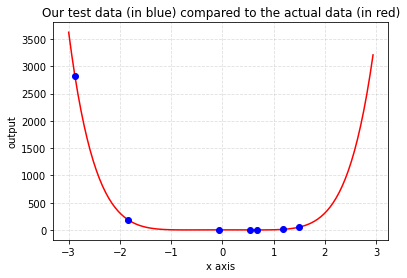

In [0]:
#We'll generate random points of data for our system.
#The actual points for the system will be stored in containers actual_data_x and actual_data_y

actual_data_x = []
actual_data_y = []

#We'll use (cough... cough...) three   data points:
for i in range(7):
    # pick a random number between -5 and 5
    x = 6*random.random() - 3
    f = 4 - 3*x**2 + 5*x**6
    actual_data_x.append(x)
    actual_data_y.append(f)


#Create the matrix M from the data in actual_data_x
M_entries = []

for x in actual_data_x:
  M_entries.append([1, x, x**2, x**3, x**4, x**5, x**6])

M = []
M = np.matrix(M_entries)


#and create the vector b from the data in actual_data_y:
b = []
b = (np.matrix(actual_data_y)).transpose()

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6


# Create the plot in red, and our datapoints in blue:  
plt.plot(xdata,fdata, color='red') + plt.plot(actual_data_x, actual_data_y, 'bo')

# Add a title
plt.title('Our test data (in blue) compared to the actual data (in red)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

#  Find the solution to Mx = b using Best Fit:
#  (We've already used 'x' as a variable, so we'll call the solution vector c.)
c = linalg.inv(M.transpose() * M) * M.transpose() * b
c



In [0]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*c).transpose() * (b-M*c))[0,0]
error**0.5



1.9404470970403384e-06

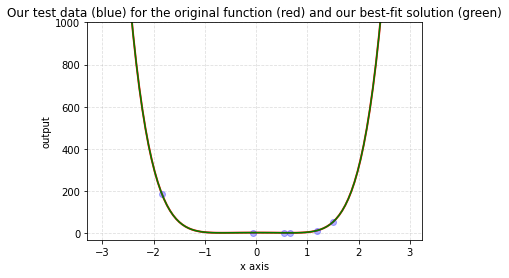

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the best-fit method in green:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3)+plt.plot(xdata,best_fit, color='green')

#Restrict the output values to this range:
plt.ylim(-30,1000)

# Add a title
plt.title('Our test data (blue) for the original function (red) and our best-fit solution (green)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [0]:
#  For this method, we use SVD on the data matrix M:
U, S, Vh = linalg.svd(M, full_matrices=True)

Vh = Vh.T

# We can compare the original matrix M to the matrix reconstructed (called a1) from the SVD:
# If they are close, then allclose(M, a1) should be True.

#First, recast S as a matrix instead of a vector:
sigma = np.zeros((U.shape[1], Vh.shape[0]))
for i in range(min(sigma.shape)):
     sigma[i, i] = S[i]
#Reconstruct the matrix:
a1 = np.dot(U, np.dot(sigma, Vh.T))

#does a1 approximate M?
np.allclose(M, a1)

#  Based on the number of non-zero singular values in S, divide each of U, sigma, and Vh into 
#  U_use, Sigma_use, and Vh_use.
#  and  discard U_d, Sigma_d, Vh_d
useSigs = 7

#Use these parts of U, S, and Vh
(Vrows, Vcols) = Vh.shape
(Urows, Ucols) = U.shape
U_use = U[:Urows, :useSigs]
Vh_use = Vh[:Vrows, :useSigs]
sigma_use = sigma[:useSigs, :useSigs]

#discard these parts of U, S, and Vh:
U_d = U[:Urows, useSigs:]
Vh_d = Vh[:Vrows, useSigs:]
sigma_d = sigma[useSigs:, useSigs:]

#  If we use Singular Value Decomposition to break down M as a product of matrices
#  M = U sigma Vh.conjugate_transpose()
#  Then the part of A which corresponds to non-zero singular values is:
#  M_use = U_use sigma_use Vh_use.conjugate_transpose()
#
#  So, the equation Mx = b becomes:  (U_use sigma_use Vh_use.conjugate_transpose()) x = b
#  or
#  svd_sol = (U_use sigma_use Vh_use.conjugate_transpose()).inverse() b
#  or
#  svd_sol = Vh_use * Sigma_use.inverse() * U_use.transpose() * b
#  (since Vh_use.conjugate_transpose() = Vh_use.inverse() and U_use.transpose() = U_use.inverse() )
svdsol = (Vh_use @ linalg.inv(sigma_use) @ U_use.transpose()) @ b
svdsol

matrix([[ 3.945953  ],
        [-0.6853771 ],
        [-1.1784211 ],
        [-0.41867172],
        [-0.96384557],
        [ 0.2155594 ],
        [ 5.14374015]])

In [0]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*svdsol).transpose() * (b-M*svdsol))[0,0]
error**0.5

0.03544524276998131

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the svd solution in aqua:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3) + plt.plot(xdata, svd_fit, 'aqua')

#Restrict the output values to this range:
plt.ylim(-300,1000)
# Add a title
plt.title('Our test data (blue) for the original function (red)  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

NameError: ignored

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

#construct the solution from bestfit:
best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6)

# Create the actual plot in red, and our datapoints in blue,
# the best-fit method in green, and the svd solution in aqua:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3) + plt.plot(xdata,best_fit, color='green') + plt.plot(xdata, svd_fit, 'aqua')


#Restrict the output values to this range:
plt.ylim(-30,30)
# Add a title
plt.title('Our test data (blue) for the original function (red); our best-fit solution (green);  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

## Case 1


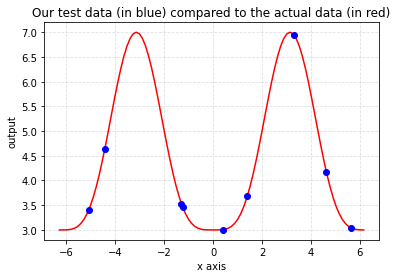

In [0]:
#We'll generate random points of data for our system.
#The actual points for the system will be stored in containers actual_data_x and actual_data_y

actual_data_x = []
actual_data_y = []

#We'll use (cough... cough...) three   data points:
for i in range(9):
    # pick a random number between -2pi and 2pi
    x = 4*np.pi*random.random() - 2*np.pi
    f = 4 - 2*np.cos(x) + np.cos(x)**2
    actual_data_x.append(x)
    actual_data_y.append(f)

#Create the matrix M from the data in actual_data_x
M_entries = []

for x in actual_data_x:
  M_entries.append([1, x, x**2, x**3, x**4, x**5, x**6, x**7, x**8])

M = []
M = np.matrix(M_entries)


#and create the vector b from the data in actual_data_y:
b = []
b = (np.matrix(actual_data_y)).transpose()

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []

#set up our 100 data points on the interval from (-2pi, 2pi):
xdata = np.array(range(100))/(100/(4*np.pi)) - 2*np.pi
# find the ouput for our function on each data point:
fdata = 4 - 2*np.cos(xdata) + np.cos(xdata)**2

# Create the plot in red, and our datapoints in blue:  
plt.plot(xdata,fdata, color='red') + plt.plot(actual_data_x, actual_data_y, 'bo')

# Add a title
plt.title('Our test data (in blue) compared to the actual data (in red)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [0]:
#  Find the solution to Mx = b using Best Fit:
#  (We've already used 'x' as a variable, so we'll call the solution vector c.)
c = linalg.inv(M.transpose() * M) * M.transpose() * b
c

matrix([[ 2.89835999e+00],
        [ 1.49297307e-01],
        [ 3.07176583e-01],
        [-9.11335485e-02],
        [ 6.01641059e-02],
        [ 8.55975930e-03],
        [-6.11474343e-03],
        [-2.11638936e-04],
        [ 1.28164249e-04]])

In [0]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*c).transpose() * (b-M*c))[0,0]
error**0.5

6.248396410780345e-09

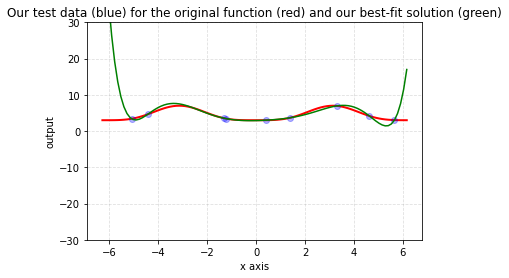

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-2pi, 2pi):
xdata = np.array(range(100))/(100/(4*np.pi)) - 2*np.pi
# find the ouput for our function on each data point:
fdata = 4 - 2*np.cos(xdata) + np.cos(xdata)**2

best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6) + c[7,0]*(xdata**7) + c[8,0]*(xdata**8)
# Create the actual plot in red, and our datapoints in blue,
# and the best-fit method in green:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3)+plt.plot(xdata,best_fit, color='green')

#Restrict the output values to this range:
plt.ylim(-30,30)

# Add a title
plt.title('Our test data (blue) for the original function (red) and our best-fit solution (green)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [0]:
#  For this method, we use SVD on the data matrix M:
U, S, Vh = linalg.svd(M, full_matrices=True)

Vh = Vh.T

# We can compare the original matrix M to the matrix reconstructed (called a1) from the SVD:
# If they are close, then allclose(M, a1) should be True.

#First, recast S as a matrix instead of a vector:
sigma = np.zeros((U.shape[1], Vh.shape[0]))
for i in range(min(sigma.shape)):
     sigma[i, i] = S[i]
a1 = np.dot(U, np.dot(sigma, Vh.T))
#does a1 approximate M?
np.allclose(M, a1)

True

In [0]:
#  Based on the number of non-zero singular values in S, divide each of U, sigma, and Vh into 
#  U_use, Sigma_use, and Vh_use.
#  and  discard U_d, Sigma_d, Vh_d
useSigs = 9

#Use these parts of U, S, and Vh
(Vrows, Vcols) = Vh.shape
(Urows, Ucols) = U.shape
U_use = U[:Urows, :useSigs]
Vh_use = Vh[:Vrows, :useSigs]
sigma_use = sigma[:useSigs, :useSigs]

#discard these parts of U, S, and Vh:
U_d = U[:Urows, useSigs:]
Vh_d = Vh[:Vrows, useSigs:]
sigma_d = sigma[useSigs:, useSigs:]

#  If we use Singular Value Decomposition to break down M as a product of matrices
#  M = U sigma Vh.conjugate_transpose()
#  Then the part of A which corresponds to non-zero singular values is:
#  M_use = U_use sigma_use Vh_use.conjugate_transpose()
#
#  So, the equation Mx = b becomes:  (U_use sigma_use Vh_use.conjugate_transpose()) x = b
#  or
#  svd_sol = (U_use sigma_use Vh_use.conjugate_transpose()).inverse() b
#  or
#  svd_sol = Vh_use * Sigma_use.inverse() * U_use.transpose() * b
#  (since Vh_use.conjugate_transpose() = Vh_use.inverse() and U_use.transpose() = U_use.inverse() )
svdsol = (Vh_use @ linalg.inv(sigma_use) @ U_use.transpose()) @ b
svdsol

matrix([[ 2.89835999e+00],
        [ 1.49297306e-01],
        [ 3.07176583e-01],
        [-9.11335484e-02],
        [ 6.01641059e-02],
        [ 8.55975929e-03],
        [-6.11474342e-03],
        [-2.11638936e-04],
        [ 1.28164248e-04]])

In [0]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*svdsol).transpose() * (b-M*svdsol))[0,0]
error**0.5

1.7710164623714234e-10

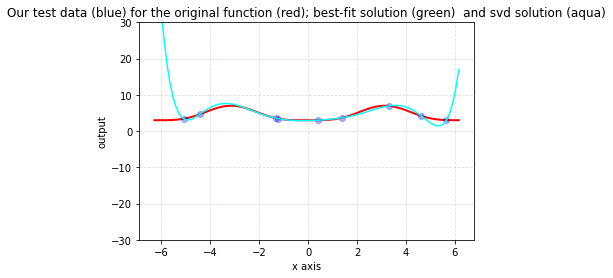

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-2pi, 2pi):
xdata = np.array(range(100))/(100/(4*np.pi)) - 2*np.pi

# find the ouput for our function on each data point:
fdata = 4 - 2*np.cos(xdata) + np.cos(xdata)**2

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6) + svdsol[7,0]*(xdata**7)+svdsol[8,0]*(xdata**8)
# Create the actual plot in red, and our datapoints in blue,
# and the svd solution in aqua:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3) + plt.plot(xdata, svd_fit, 'aqua')

#Restrict the output values to this range:
plt.ylim(-30,30)
# Add a title
plt.title('Our test data (blue) for the original function (red); best-fit solution (green)  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-2pi, 2pi):
xdata = np.array(range(100))/(100/(4*np.pi)) - 2*np.pi

# find the ouput for our function on each data point:
fdata = 4 - 2*np.cos(xdata) + np.cos(xdata)**2

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6) + svdsol[7,0]*(xdata**7)+svdsol[8,0]*(xdata**8)
#construct the solution from bestfit
best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6) + c[7,0]*(xdata**7) + c[8,0]*(xdata**8)
# Create the actual plot in red, and our datapoints in blue,
# the best-fit method in green, and the svd solution in aqua:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3)+plt.plot(xdata,best_fit, color='green') + plt.plot(xdata, svd_fit, 'aqua')

#Restrict the output values to this range:
plt.ylim(-30,30)
# Add a title
plt.title('Our test data (blue) for the original function (red); best-fit solution (green)  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

## Case 2

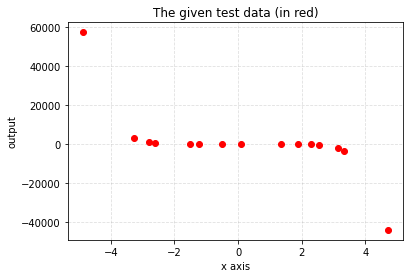

In [0]:
# The given data:

givenData = np.matrix([[-0.5089311944969932, -2.997008799965525], [3.327488211195128, -3453.7808944274257], [-1.237609470172906, -3.448414068353971], [2.2958559720851195, -189.2901607053327], [2.532411423046172, -418.96127216944654], [1.3405346345538653, 2.546491821468372], [0.10426496119492867, 0.7242241444032073], [1.873893206052621, -31.60154297604621], [-2.6209761598859194, 550.2765944168342], [-4.869993332193264, 57293.33257004533], [-2.79570102459193, 912.1837362481141], [3.1432036480386607, -2244.0036951744164], [-1.5085874374805952, 0.9480325600081159], [-3.256509676471614, 2935.0556185427467], [4.699243005535804, -44216.37934554891]])

# pull of the x-coordinates and the outputs from the data:
actual_data_x = givenData[:,0]   # first column of the matrix
actual_data_y = givenData[:,1]   # second column of the matrix

#Create the matrix M from the data in actual_data_x
M_entries = []

for i in actual_data_x:
  x = i[0,0]
  M_entries.append([1, x, x**2, x**3, x**4, x**5, x**6, x**7, x**8])

M = []
M = np.matrix(M_entries)


#and create the vector b from the data in actual_data_y:
b = []
b = actual_data_y

# Let's plot the data to see what it looks like:

# We'll specify that x is a variable:
x = sym.symbols('x')

#  Create the plot of the given data in as red points:
plt.plot(actual_data_x, actual_data_y, 'ro')

#Widen or restrict the output values to this range:
#You may have to adjust this to see more of the data points.
#plt.ylim(-30,30)

# Add a title
plt.title('The given test data (in red)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [0]:
#  Find the solution to Mx = b using Best Fit:
#  (We've already used 'x' as a variable, so we'll call the solution vector c.)
c = linalg.inv(M.transpose() * M) * M.transpose() * b
c

matrix([[-5.16649834e-10],
        [ 7.00000000e+00],
        [ 1.26760824e-09],
        [-5.00000000e+00],
        [-4.31867875e-10],
        [ 3.00000000e+00],
        [-1.62359015e-12],
        [-1.00000000e+00],
        [ 1.32249767e-12]])

In [0]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*c).transpose() * (b-M*c))[0,0]
error**0.5

2.2667832650108537e-07

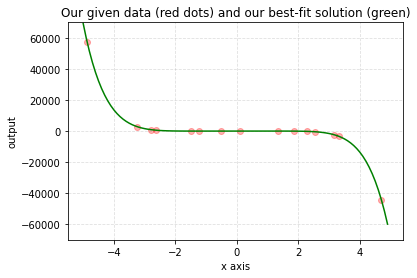

In [0]:
#Show a plot of the solutions using the best-fit method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-5, 5):
xdata = np.array(range(100))/(100/10) - 5

#Best fit method
best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6) + c[7,0]*(xdata**7) + c[8,0]*(xdata**8)
#  Create the plot of the given data in as red points:
# and the best-fit method in green: 
plt.plot(actual_data_x,actual_data_y, 'ro', alpha=0.3 ) + plt.plot(xdata,best_fit, color='green')

#Widen or restrict the output values to this range:
#You may have to adjust this to see more of the data points.
plt.ylim(-70000,70000)

# Add a title
plt.title('Our given data (red dots) and our best-fit solution (green)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [0]:
#  For this method, we use SVD on the data matrix M:
U, S, Vh = linalg.svd(M, full_matrices=True)

Vh = Vh.T

# We can compare the original matrix M to the matrix reconstructed (called a1) from the SVD:
# If they are close, then allclose(M, a1) should be True.

#First, recast S as a matrix instead of a vector:
sigma = np.zeros((U.shape[1], Vh.shape[0]))
for i in range(min(sigma.shape)):
     sigma[i, i] = S[i]
#Reconstruct the matrix:
a1 = np.dot(U, np.dot(sigma, Vh.T))

#does a1 approximate M?
np.allclose(M, a1)

#  Based on the number of non-zero singular values in S, divide each of U, sigma, and Vh into 
#  U_use, Sigma_use, and Vh_use.
#  and  discard U_d, Sigma_d, Vh_d
useSigs = 8

#Use these parts of U, S, and Vh
(Vrows, Vcols) = Vh.shape
(Urows, Ucols) = U.shape
U_use = U[:Urows, :useSigs]
Vh_use = Vh[:Vrows, :useSigs]
sigma_use = sigma[:useSigs, :useSigs]

#discard these parts of U, S, and Vh:
U_d = U[:Urows, useSigs:]
Vh_d = Vh[:Vrows, useSigs:]
sigma_d = sigma[useSigs:, useSigs:]

#  If we use Singular Value Decomposition to break down M as a product of matrices
#  M = U sigma Vh.conjugate_transpose()
#  Then the part of A which corresponds to non-zero singular values is:
#  M_use = U_use sigma_use Vh_use.conjugate_transpose()
#
#  So, the equation Mx = b becomes:  (U_use sigma_use Vh_use.conjugate_transpose()) x = b
#  or
#  svd_sol = (U_use sigma_use Vh_use.conjugate_transpose()).inverse() b
#  or
#  svd_sol = Vh_use * Sigma_use.inverse() * U_use.transpose() * b
#  (since Vh_use.conjugate_transpose() = Vh_use.inverse() and U_use.transpose() = U_use.inverse() )
svdsol = (Vh_use @ linalg.inv(sigma_use) @ U_use.transpose()) @ b
svdsol

matrix([[-6.62679070e-01],
        [ 6.87921977e+00],
        [ 7.02456477e-01],
        [-4.97459275e+00],
        [-1.69847921e-01],
        [ 2.99854422e+00],
        [ 1.39928906e-02],
        [-9.99996849e-01],
        [-3.43146604e-04]])

In [0]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*svdsol).transpose() * (b-M*svdsol))[0,0]
error**0.5

0.9166748386775093

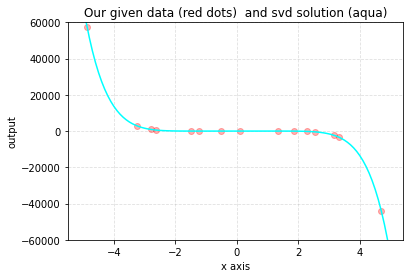

In [0]:
#Show a plot of the solutions using the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-5, 5):
xdata = np.array(range(100))/(100/10) - 5

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6) + svdsol[7,0]*(xdata**7) + svdsol[8,0]*(xdata**8)
#  Create the plot of the given data in as red points:
# and the svd solution in aqua:  
plt.plot(actual_data_x,actual_data_y, 'ro', alpha=0.3 ) + plt.plot(xdata,svd_fit, color='aqua')

#Widen or restrict the output values to this range:
#You may have to adjust this to see more of the data points.
plt.ylim(-60000,60000)

# Add a title
plt.title('Our given data (red dots)  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

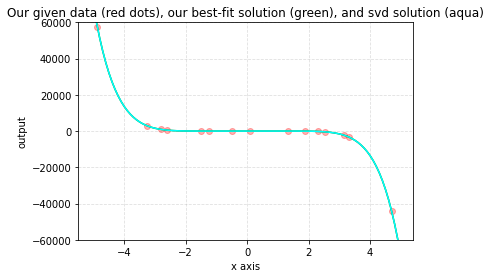

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-5, 5):
xdata = np.array(range(100))/(100/10) - 5

#Best fit method
best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6) + c[7,0]*(xdata**7) + c[8,0]*(xdata**8)

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3)+ svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6) + svdsol[7,0]*(xdata**7) + svdsol[8,0]*(xdata**8)

#  Create the plot of the given data in as red points:
#  the best-fit method in green, and the svd solution in aqua:  
plt.plot(actual_data_x,actual_data_y, 'ro', alpha=0.3 ) + plt.plot(xdata,best_fit, color='green') + plt.plot(xdata,svd_fit, color='aqua')

#Widen or restrict the output values to this range:
#You may have to adjust this to see more of the data points.
plt.ylim(-60000,60000)

# Add a title
plt.title('Our given data (red dots), our best-fit solution (green), and svd solution (aqua)')
# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

## Case 3

## Case with (-1,1) Randomness

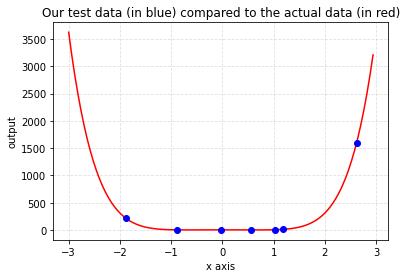

In [0]:


#We'll generate random points of data for our system.
#The actual points for the system will be stored in containers actual_data_x and actual_data_y

actual_data_x = []
actual_data_y = []

#We'll use (cough... cough...) three   data points:
for i in range(7):
    # pick a random number between -5 and 5
    x = 6*random.random() - 3
    f = 4 - 3*x**2 + 5*x**6 
    g = 4 - 3*x**2 + 5*x**6 + 2*random.random() - 1
    actual_data_x.append(x)
    actual_data_y.append(g)


#Create the matrix M from the data in actual_data_x
M_entries = []

for x in actual_data_x:
  M_entries.append([1, x, x**2, x**3, x**4, x**5, x**6])

M = []
M = np.matrix(M_entries)


#and create the vector b from the data in actual_data_y:
b = []
b = (np.matrix(actual_data_y)).transpose()

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6


# Create the plot in red, and our datapoints in blue:  
plt.plot(xdata,fdata, color='red') + plt.plot(actual_data_x, actual_data_y, 'bo')

# Add a title
plt.title('Our test data (in blue) compared to the actual data (in red)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

#  Find the solution to Mx = b using Best Fit:
#  (We've already used 'x' as a variable, so we'll call the solution vector c.)
c = linalg.inv(M.transpose() * M) * M.transpose() * b

In [0]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*c).transpose() * (b-M*c))[0,0]
error**0.5

3.177541126548583e-08

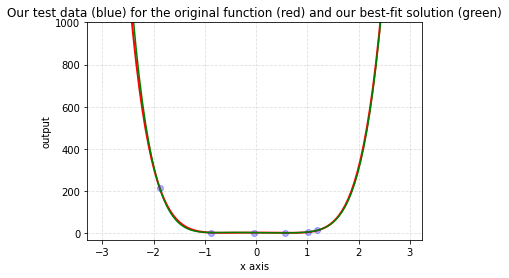

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the best-fit method in green:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3)+plt.plot(xdata,best_fit, color='green')

#Restrict the output values to this range:
plt.ylim(-30,1000)

# Add a title
plt.title('Our test data (blue) for the original function (red) and our best-fit solution (green)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [0]:
#  For this method, we use SVD on the data matrix M:
U, S, Vh = linalg.svd(M, full_matrices=True)

Vh = Vh.T

# We can compare the original matrix M to the matrix reconstructed (called a1) from the SVD:
# If they are close, then allclose(M, a1) should be True.

#First, recast S as a matrix instead of a vector:
sigma = np.zeros((U.shape[1], Vh.shape[0]))
for i in range(min(sigma.shape)):
     sigma[i, i] = S[i]
#Reconstruct the matrix:
a1 = np.dot(U, np.dot(sigma, Vh.T))

#does a1 approximate M?
np.allclose(M, a1)

#  Based on the number of non-zero singular values in S, divide each of U, sigma, and Vh into 
#  U_use, Sigma_use, and Vh_use.
#  and  discard U_d, Sigma_d, Vh_d
useSigs = 6

#Use these parts of U, S, and Vh
(Vrows, Vcols) = Vh.shape
(Urows, Ucols) = U.shape
U_use = U[:Urows, :useSigs]
Vh_use = Vh[:Vrows, :useSigs]
sigma_use = sigma[:useSigs, :useSigs]

#discard these parts of U, S, and Vh:
U_d = U[:Urows, useSigs:]
Vh_d = Vh[:Vrows, useSigs:]
sigma_d = sigma[useSigs:, useSigs:]

#  If we use Singular Value Decomposition to break down M as a product of matrices
#  M = U sigma Vh.conjugate_transpose()
#  Then the part of A which corresponds to non-zero singular values is:
#  M_use = U_use sigma_use Vh_use.conjugate_transpose()
#
#  So, the equation Mx = b becomes:  (U_use sigma_use Vh_use.conjugate_transpose()) x = b
#  or
#  svd_sol = (U_use sigma_use Vh_use.conjugate_transpose()).inverse() b
#  or
#  svd_sol = Vh_use * Sigma_use.inverse() * U_use.transpose() * b
#  (since Vh_use.conjugate_transpose() = Vh_use.inverse() and U_use.transpose() = U_use.inverse() )
svdsol = (Vh_use @ linalg.inv(sigma_use) @ U_use.transpose()) @ b
svdsol

matrix([[ 3.99497904],
        [-0.36295025],
        [-2.33512991],
        [ 0.33879755],
        [-0.04835756],
        [-0.01261897],
        [ 4.98165026]])

In [0]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*svdsol).transpose() * (b-M*svdsol))[0,0]
error**0.5

0.44510865292134294

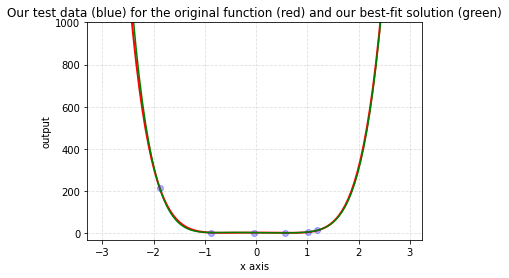

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the best-fit method in green:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3)+plt.plot(xdata,best_fit, color='green')

#Restrict the output values to this range:
plt.ylim(-30,1000)

# Add a title
plt.title('Our test data (blue) for the original function (red) and our best-fit solution (green)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

## Case with (-5, 5) Randomness

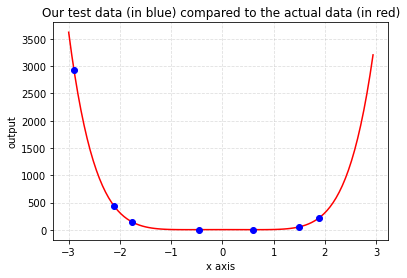

In [0]:


#We'll generate random points of data for our system.
#The actual points for the system will be stored in containers actual_data_x and actual_data_y

actual_data_x = []
actual_data_y = []

#We'll use (cough... cough...) three   data points:
for i in range(7):
    # pick a random number between -5 and 5
    x = 6*random.random() - 3
    f = 4 - 3*x**2 + 5*x**6 
    g = 4 - 3*x**2 + 5*x**6 + 10*random.random() - 5
    actual_data_x.append(x)
    actual_data_y.append(g)


#Create the matrix M from the data in actual_data_x
M_entries = []

for x in actual_data_x:
  M_entries.append([1, x, x**2, x**3, x**4, x**5, x**6])

M = []
M = np.matrix(M_entries)


#and create the vector b from the data in actual_data_y:
b = []
b = (np.matrix(actual_data_y)).transpose()

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6


# Create the plot in red, and our datapoints in blue:  
plt.plot(xdata,fdata, color='red') + plt.plot(actual_data_x, actual_data_y, 'bo')

# Add a title
plt.title('Our test data (in blue) compared to the actual data (in red)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

#  Find the solution to Mx = b using Best Fit:
#  (We've already used 'x' as a variable, so we'll call the solution vector c.)
c = linalg.inv(M.transpose() * M) * M.transpose() * b

In [0]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*c).transpose() * (b-M*c))[0,0]
error**0.5

8.583842088337616e-10

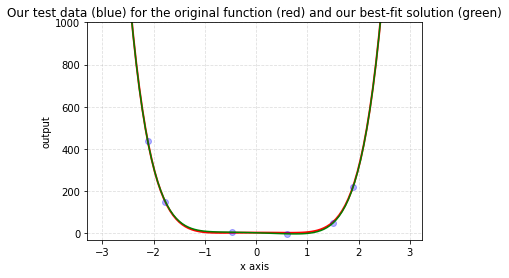

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the best-fit method in green:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3)+plt.plot(xdata,best_fit, color='green')

#Restrict the output values to this range:
plt.ylim(-30,1000)

# Add a title
plt.title('Our test data (blue) for the original function (red) and our best-fit solution (green)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [0]:
#  For this method, we use SVD on the data matrix M:
U, S, Vh = linalg.svd(M, full_matrices=True)

Vh = Vh.T

# We can compare the original matrix M to the matrix reconstructed (called a1) from the SVD:
# If they are close, then allclose(M, a1) should be True.

#First, recast S as a matrix instead of a vector:
sigma = np.zeros((U.shape[1], Vh.shape[0]))
for i in range(min(sigma.shape)):
     sigma[i, i] = S[i]
#Reconstruct the matrix:
a1 = np.dot(U, np.dot(sigma, Vh.T))

#does a1 approximate M?
np.allclose(M, a1)

#  Based on the number of non-zero singular values in S, divide each of U, sigma, and Vh into 
#  U_use, Sigma_use, and Vh_use.
#  and  discard U_d, Sigma_d, Vh_d
useSigs = 6

#Use these parts of U, S, and Vh
(Vrows, Vcols) = Vh.shape
(Urows, Ucols) = U.shape
U_use = U[:Urows, :useSigs]
Vh_use = Vh[:Vrows, :useSigs]
sigma_use = sigma[:useSigs, :useSigs]

#discard these parts of U, S, and Vh:
U_d = U[:Urows, useSigs:]
Vh_d = Vh[:Vrows, useSigs:]
sigma_d = sigma[useSigs:, useSigs:]

#  If we use Singular Value Decomposition to break down M as a product of matrices
#  M = U sigma Vh.conjugate_transpose()
#  Then the part of A which corresponds to non-zero singular values is:
#  M_use = U_use sigma_use Vh_use.conjugate_transpose()
#
#  So, the equation Mx = b becomes:  (U_use sigma_use Vh_use.conjugate_transpose()) x = b
#  or
#  svd_sol = (U_use sigma_use Vh_use.conjugate_transpose()).inverse() b
#  or
#  svd_sol = Vh_use * Sigma_use.inverse() * U_use.transpose() * b
#  (since Vh_use.conjugate_transpose() = Vh_use.inverse() and U_use.transpose() = U_use.inverse() )
svdsol = (Vh_use @ linalg.inv(sigma_use) @ U_use.transpose()) @ b
svdsol

matrix([[ 1.56030817],
        [-5.30785521],
        [ 2.03223415],
        [ 0.16597028],
        [-2.26399407],
        [ 0.26324386],
        [ 5.27642867]])

In [0]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*svdsol).transpose() * (b-M*svdsol))[0,0]
error**0.5

2.6144789659310947

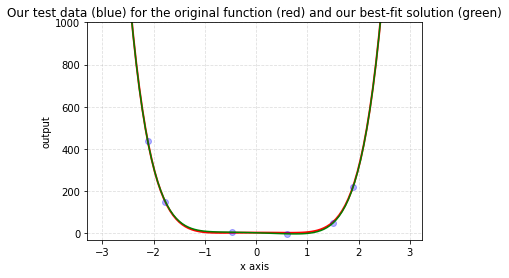

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the best-fit method in green:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3)+plt.plot(xdata,best_fit, color='green')

#Restrict the output values to this range:
plt.ylim(-30,1000)

# Add a title
plt.title('Our test data (blue) for the original function (red) and our best-fit solution (green)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

## Case with (-30, 30) Randomness

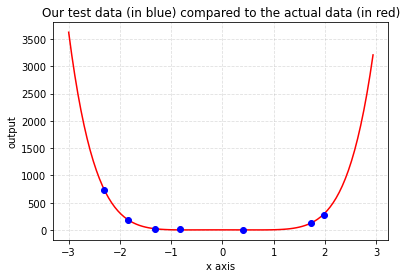

In [0]:


#We'll generate random points of data for our system.
#The actual points for the system will be stored in containers actual_data_x and actual_data_y

actual_data_x = []
actual_data_y = []

#We'll use (cough... cough...) three   data points:
for i in range(7):
    # pick a random number between -5 and 5
    x = 6*random.random() - 3
    f = 4 - 3*x**2 + 5*x**6 
    g = 4 - 3*x**2 + 5*x**6 + 60*random.random() - 30
    actual_data_x.append(x)
    actual_data_y.append(g)


#Create the matrix M from the data in actual_data_x
M_entries = []

for x in actual_data_x:
  M_entries.append([1, x, x**2, x**3, x**4, x**5, x**6])

M = []
M = np.matrix(M_entries)


#and create the vector b from the data in actual_data_y:
b = []
b = (np.matrix(actual_data_y)).transpose()

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6


# Create the plot in red, and our datapoints in blue:  
plt.plot(xdata,fdata, color='red') + plt.plot(actual_data_x, actual_data_y, 'bo')

# Add a title
plt.title('Our test data (in blue) compared to the actual data (in red)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

#  Find the solution to Mx = b using Best Fit:
#  (We've already used 'x' as a variable, so we'll call the solution vector c.)
c = linalg.inv(M.transpose() * M) * M.transpose() * b

In [0]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*c).transpose() * (b-M*c))[0,0]
error**0.5

6.499771561089011e-10

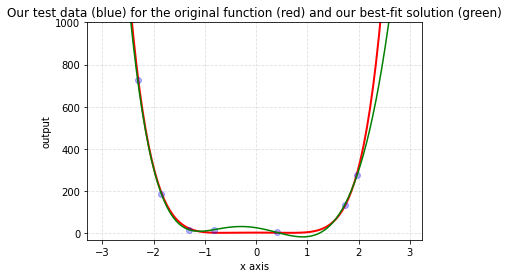

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the best-fit method in green:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3)+plt.plot(xdata,best_fit, color='green')

#Restrict the output values to this range:
plt.ylim(-30,1000)

# Add a title
plt.title('Our test data (blue) for the original function (red) and our best-fit solution (green)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [0]:
#  For this method, we use SVD on the data matrix M:
U, S, Vh = linalg.svd(M, full_matrices=True)

Vh = Vh.T

# We can compare the original matrix M to the matrix reconstructed (called a1) from the SVD:
# If they are close, then allclose(M, a1) should be True.

#First, recast S as a matrix instead of a vector:
sigma = np.zeros((U.shape[1], Vh.shape[0]))
for i in range(min(sigma.shape)):
     sigma[i, i] = S[i]
#Reconstruct the matrix:
a1 = np.dot(U, np.dot(sigma, Vh.T))

#does a1 approximate M?
np.allclose(M, a1)

#  Based on the number of non-zero singular values in S, divide each of U, sigma, and Vh into 
#  U_use, Sigma_use, and Vh_use.
#  and  discard U_d, Sigma_d, Vh_d
useSigs = 7

#Use these parts of U, S, and Vh
(Vrows, Vcols) = Vh.shape
(Urows, Ucols) = U.shape
U_use = U[:Urows, :useSigs]
Vh_use = Vh[:Vrows, :useSigs]
sigma_use = sigma[:useSigs, :useSigs]

#discard these parts of U, S, and Vh:
U_d = U[:Urows, useSigs:]
Vh_d = Vh[:Vrows, useSigs:]
sigma_d = sigma[useSigs:, useSigs:]

#  If we use Singular Value Decomposition to break down M as a product of matrices
#  M = U sigma Vh.conjugate_transpose()
#  Then the part of A which corresponds to non-zero singular values is:
#  M_use = U_use sigma_use Vh_use.conjugate_transpose()
#
#  So, the equation Mx = b becomes:  (U_use sigma_use Vh_use.conjugate_transpose()) x = b
#  or
#  svd_sol = (U_use sigma_use Vh_use.conjugate_transpose()).inverse() b
#  or
#  svd_sol = Vh_use * Sigma_use.inverse() * U_use.transpose() * b
#  (since Vh_use.conjugate_transpose() = Vh_use.inverse() and U_use.transpose() = U_use.inverse() )
svdsol = (Vh_use @ linalg.inv(sigma_use) @ U_use.transpose()) @ b
svdsol

matrix([[ 27.17229637],
        [-37.98456156],
        [-56.94382101],
        [ 29.84787546],
        [ 27.07605584],
        [ -5.23670603],
        [  1.08777829]])

In [0]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*svdsol).transpose() * (b-M*svdsol))[0,0]
error**0.5

3.2940270965496186e-12

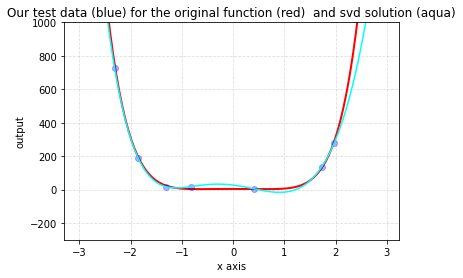

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the svd solution in aqua:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3) + plt.plot(xdata, svd_fit, 'aqua')

#Restrict the output values to this range:
plt.ylim(-300,1000)
# Add a title
plt.title('Our test data (blue) for the original function (red)  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

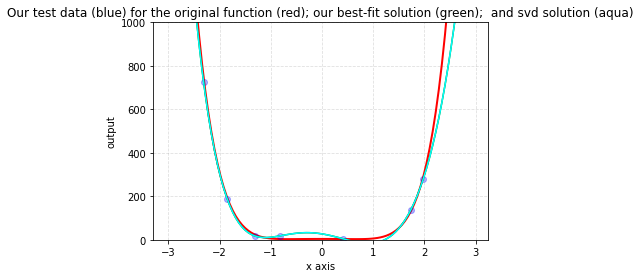

In [0]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

#construct the solution from bestfit:
best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6)

# Create the actual plot in red, and our datapoints in blue,
# the best-fit method in green, and the svd solution in aqua:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3) + plt.plot(xdata,best_fit, color='green') + plt.plot(xdata, svd_fit, 'aqua')


#Restrict the output values to this range:
plt.ylim(0,1000)
# Add a title
plt.title('Our test data (blue) for the original function (red); our best-fit solution (green);  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

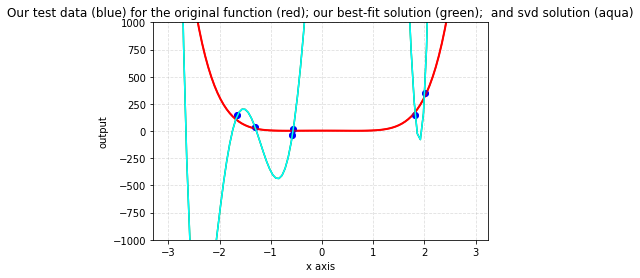

In [0]:


#We'll generate random points of data for our system.
#The actual points for the system will be stored in containers actual_data_x and actual_data_y

actual_data_x = []
actual_data_y = []

#We'll use (cough... cough...) three   data points:
for i in range(7):
    # pick a random number between -5 and 5
    x = 6*random.random() - 3
    f = 4 - 3*x**2 + 5*x**6 
    g = 4 - 3*x**2 + 5*x**6 + 100*random.random() - 50
    actual_data_x.append(x)
    actual_data_y.append(g)


#Create the matrix M from the data in actual_data_x
M_entries = []

for x in actual_data_x:
  M_entries.append([1, x, x**2, x**3, x**4, x**5, x**6])

M = []
M = np.matrix(M_entries)


#and create the vector b from the data in actual_data_y:
b = []
b = (np.matrix(actual_data_y)).transpose()

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6


# Create the plot in red, and our datapoints in blue:  
plt.plot(xdata,fdata, color='red') + plt.plot(actual_data_x, actual_data_y, 'bo')

# Add a title
plt.title('Our test data (in blue) compared to the actual data (in red)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

#  Find the solution to Mx = b using Best Fit:
#  (We've already used 'x' as a variable, so we'll call the solution vector c.)
c = linalg.inv(M.transpose() * M) * M.transpose() * b

#  For this method, we use SVD on the data matrix M:
U, S, Vh = linalg.svd(M, full_matrices=True)

Vh = Vh.T

# We can compare the original matrix M to the matrix reconstructed (called a1) from the SVD:
# If they are close, then allclose(M, a1) should be True.

#First, recast S as a matrix instead of a vector:
sigma = np.zeros((U.shape[1], Vh.shape[0]))
for i in range(min(sigma.shape)):
     sigma[i, i] = S[i]
#Reconstruct the matrix:
a1 = np.dot(U, np.dot(sigma, Vh.T))

#does a1 approximate M?
np.allclose(M, a1)

#  Based on the number of non-zero singular values in S, divide each of U, sigma, and Vh into 
#  U_use, Sigma_use, and Vh_use.
#  and  discard U_d, Sigma_d, Vh_d
useSigs = 7

#Use these parts of U, S, and Vh
(Vrows, Vcols) = Vh.shape
(Urows, Ucols) = U.shape
U_use = U[:Urows, :useSigs]
Vh_use = Vh[:Vrows, :useSigs]
sigma_use = sigma[:useSigs, :useSigs]

#discard these parts of U, S, and Vh:
U_d = U[:Urows, useSigs:]
Vh_d = Vh[:Vrows, useSigs:]
sigma_d = sigma[useSigs:, useSigs:]

#  If we use Singular Value Decomposition to break down M as a product of matrices
#  M = U sigma Vh.conjugate_transpose()
#  Then the part of A which corresponds to non-zero singular values is:
#  M_use = U_use sigma_use Vh_use.conjugate_transpose()
#
#  So, the equation Mx = b becomes:  (U_use sigma_use Vh_use.conjugate_transpose()) x = b
#  or
#  svd_sol = (U_use sigma_use Vh_use.conjugate_transpose()).inverse() b
#  or
#  svd_sol = Vh_use * Sigma_use.inverse() * U_use.transpose() * b
#  (since Vh_use.conjugate_transpose() = Vh_use.inverse() and U_use.transpose() = U_use.inverse() )
svdsol = (Vh_use @ linalg.inv(sigma_use) @ U_use.transpose()) @ b
svdsol

#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

#construct the solution from bestfit:
best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6)

# Create the actual plot in red, and our datapoints in blue,
# the best-fit method in green, and the svd solution in aqua:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3) + plt.plot(xdata,best_fit, color='green') + plt.plot(xdata, svd_fit, 'aqua')


#Restrict the output values to this range:
plt.ylim(-1000,1000)
# Add a title
plt.title('Our test data (blue) for the original function (red); our best-fit solution (green);  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')